In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ccb = pd.read_csv('.././data/credit_card_balance.csv')

In [8]:
display(ccb.sample(8))
print(f'Credit Card baalnce data contains:\n{ccb.shape[0]} rows and {ccb.shape[1]} columns')
print(f'\n\nCredit Card balance data information:\n')
print(ccb.info())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3459716,2260638,439052,-15,393618.78,450000,0.0,0.000,0.0,0.000,19729.89,20441.250,20441.25,374156.955,393618.78,393618.78,0.0,0,0.0,0.0,13.0,Active,0,0
700538,2756054,181991,-22,0.00,0,NaN,0.000,NaN,NaN,0.00,NaN,0.00,0.000,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
975835,2425020,287262,-12,0.00,0,NaN,0.000,NaN,NaN,0.00,NaN,0.00,0.000,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1070268,1969781,367965,-7,0.00,0,0.0,0.000,0.0,0.000,0.00,113.445,0.00,0.000,0.00,0.00,0.0,0,0.0,0.0,85.0,Active,0,0
3374906,1213747,214667,-39,0.00,157500,NaN,0.000,NaN,NaN,NaN,NaN,0.00,0.000,0.00,0.00,NaN,0,NaN,NaN,NaN,Active,0,0
2702101,1557354,108262,-25,52844.85,135000,36000.0,40065.165,0.0,4065.165,6750.00,81000.000,81000.00,46868.175,52844.85,52844.85,2.0,3,0.0,1.0,65.0,Active,0,0
1031650,2430208,455630,-36,0.00,180000,0.0,0.000,0.0,0.000,0.00,411.300,0.00,0.000,0.00,0.00,0.0,0,0.0,0.0,9.0,Active,0,0
2677436,1011875,334785,-43,181980.00,180000,0.0,4500.000,4500.0,0.000,9000.00,9000.000,9000.00,173995.155,180940.68,180940.68,0.0,1,1.0,0.0,36.0,Active,0,0


Credit Card baalnce data contains:
3840312 rows and 23 columns


Credit Card balance data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17 

In [5]:
# function to plot missing value percentage
def plot_missing_percentage(df):
    """
    Plot the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    """
    # Calculate the percentage of missing values
    missing = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with the results
    percentage_missing = pd.DataFrame({'column': df.columns, 'missing_percentage %': missing.values})
    percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
    percentage_missing = percentage_missing.sort_values('missing_percentage %', ascending=False)
    percentage_missing = percentage_missing.reset_index()
    percentage_missing = percentage_missing.drop('index', axis=1)

    # Plot the results
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)
    plt.title('Missing values Percentage for Each Column', fontsize=17, fontweight='bold')
    plt.ylabel('Kolom', fontsize=12)
    plt.xlabel('missing_percentage %', fontsize=12)
    plt.tight_layout()
    plt.xlim(0, 100)
    plt.show()

    # function to drop columns with missing values
def dropna(df, threshold=0.3):
    '''
    Drop columns from a DataFrame where the proprortion of missing values is greater than specified threshold.

    Parameters:
    df: The DataFrame to process
    threshold: The threshold proportion of missing vales. Columns with a proportion of missing values greater than this will be dropped.

    Returns:
    Pandas.DataFrame: The processed DataFrame. 
    '''
    for column in df.columns:
        missing_proportion = df[column].isnull().sum() / len(df)
        if missing_proportion > threshold:
            df = df.drop(column, axis=1)
    return df

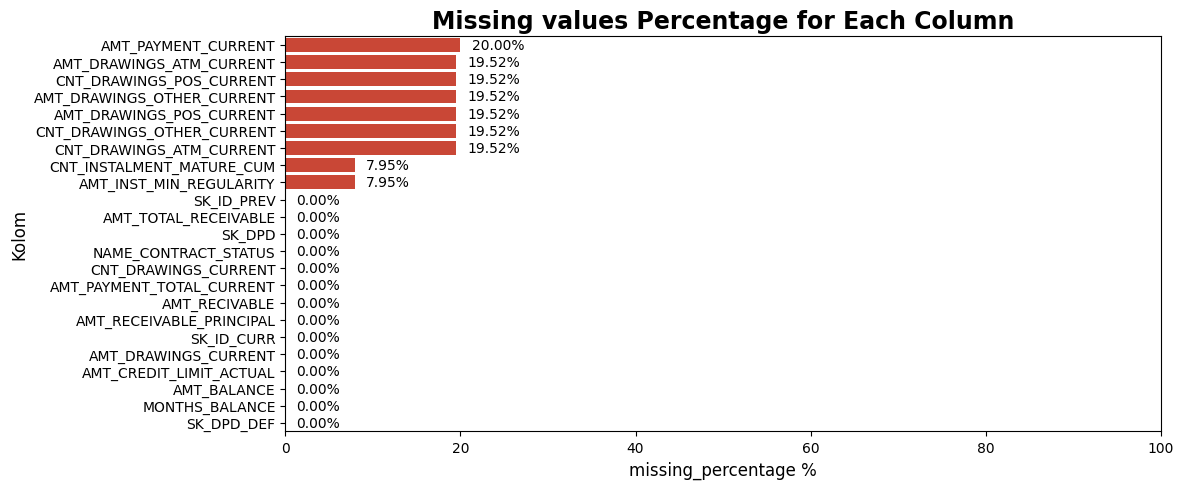

In [6]:
plot_missing_percentage(ccb)


In [10]:
ccb.loc[ccb.AMT_PAYMENT_CURRENT.isna()].sample(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
632522,2055519,395528,-7,4945.5,45000,4500.0,4500.0,0.0,0.0,0.0,NaN,0.0,4500.0,4500.0,4500.0,1.0,1,0.0,0.0,0.0,Active,0,0
1187156,2369867,191871,-6,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2216819,2613149,431838,-3,0.0,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2884070,2539440,454267,-5,0.0,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3786878,2677435,339505,-35,0.0,450000,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,Active,0,0
3042671,2387817,403316,-18,0.0,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3435266,1130058,416736,-6,0.0,90000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2470339,1794078,309462,-29,0.0,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1217665,1107597,165509,-7,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3031458,1395344,289696,-14,0.0,0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [11]:
ccb.fillna(0, inplace=True)